# Step 3: Machine Learning Methods

In this step, we apply supervised machine learning methods to analyze the relationship
between AI popularity and employment and wage trends of graphic designers.

In accordance with course guidelines, we use more than one analytical method:
- Simple Linear Regression
- Multiple Linear Regression

These methods are chosen due to the small dataset size and the need for interpretability.


In [85]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [86]:
#Loading the dataset
df = pd.read_csv("final_dataset.csv")
df


,Year,Employment,Median_Wage,AI_Popularity
0,2015,205890.0,43400.188679,0.479167
1,2016,212110.0,44008.113208,0.437500
2,2017,211330.0,44803.962264,0.555556
3,2018,219070.0,46347.358491,0.611111
4,2019,216990.0,47972.830189,0.583333
5,2020,202290.0,49450.188679,0.895833
6,2021,205050.0,49571.132075,1.416667
7,2022,213050.0,52632.452830,14.219697
8,2023,214060.0,53456.981132,61.375000
9,2024,215560.0,56105.849057,78.750000


In [87]:
#Simple LINEAR REGRESSION  Employment= B0​+ B1​xAI_Popularity
X = df[["AI_Popularity"]]
y_emp = df["Employment"]

model_emp_simple = LinearRegression()
model_emp_simple.fit(X, y_emp)

emp_pred = model_emp_simple.predict(X)

print("Simple Linear Regression — Employment")
print("Coefficient (AI):", model_emp_simple.coef_[0])
print("Intercept:", model_emp_simple.intercept_)
print("R²:", r2_score(y_emp, emp_pred))


Simple Linear Regression — Employment
Coefficient (AI): 62.91332337127005
Intercept: 210537.64062462852
R²: 0.11146546373546207


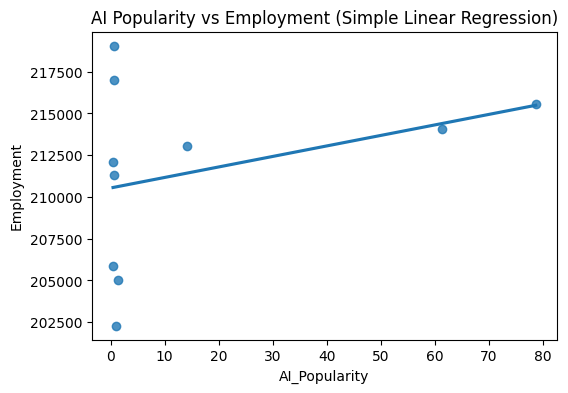

In [88]:
#Plot 
plt.figure(figsize=(6,4))
sns.regplot(x="AI_Popularity", y="Employment", data=df,ci=None)
plt.title("AI Popularity vs Employment (Simple Linear Regression)")
plt.savefig("AI_vs_emp_linear_reg.png")
plt.show()

In [89]:
#Simple LINEAR REGRESSION Median_Wage= B0​+B1​xAI_Popularity

y_wage = df["Median_Wage"]

model_wage_simple = LinearRegression()
model_wage_simple.fit(X, y_wage)

wage_pred = model_wage_simple.predict(X)

print("Simple Linear Regression — Wage")
print("Coefficient (AI):", model_wage_simple.coef_[0])
print("Intercept:", model_wage_simple.intercept_)
print("R²:", r2_score(y_wage, wage_pred))


Simple Linear Regression — Wage
Coefficient (AI): 119.48436717951797
Intercept: 46871.23455805869
R²: 0.6585483097297717


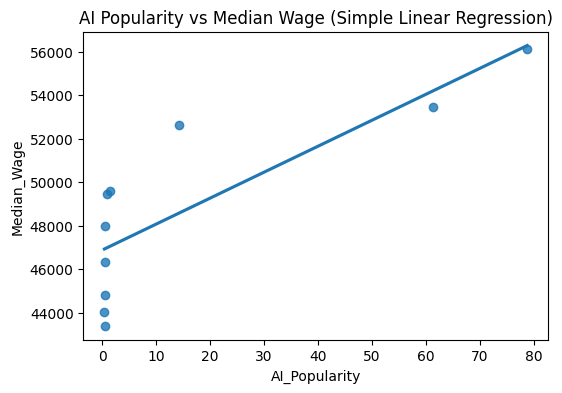

In [90]:
plt.figure(figsize=(6,4))
sns.regplot(x="AI_Popularity", y="Median_Wage", data=df, ci=None)
plt.title("AI Popularity vs Median Wage (Simple Linear Regression)")
plt.savefig("AI_vs_wage_linear_reg.png")
plt.show()



In [91]:
#Multiple LINEAR REGRESSION Employment=B0​+B1​⋅AI+B2​⋅Year
X_multi = df[["AI_Popularity", "Year"]]

model_emp_multi = LinearRegression()
model_emp_multi.fit(X_multi, y_emp)

emp_pred_multi = model_emp_multi.predict(X_multi)

print("Multiple Linear Regression — Employment")
print("Coefficient (AI):", model_emp_multi.coef_[0])
print("Coefficient (Year):", model_emp_multi.coef_[1])
print("Intercept:", model_emp_multi.intercept_)
print("R²:", r2_score(y_emp, emp_pred_multi))


Multiple Linear Regression — Employment
Coefficient (AI): 88.74607448822685
Coefficient (Year): -328.22550080764023
Intercept: 872977.4621340269
R²: 0.12544872022385722


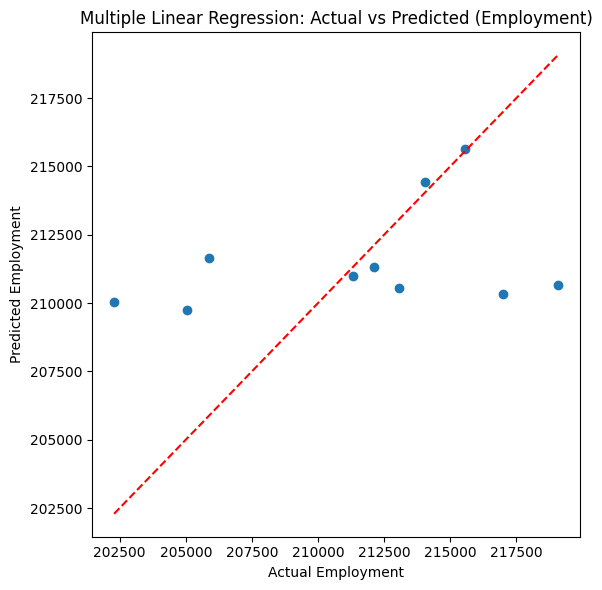

In [92]:
# Actual vs Predicted — Multiple Linear Regression (Employment)
plt.figure(figsize=(6,6))
plt.scatter(y_emp, emp_pred_multi)
plt.plot([y_emp.min(), y_emp.max()],
         [y_emp.min(), y_emp.max()],
         'r--')
plt.xlabel("Actual Employment")
plt.ylabel("Predicted Employment")
plt.title("Multiple Linear Regression: Actual vs Predicted (Employment)")
plt.tight_layout()
plt.savefig("Actual_vs_Predicted_emp_multreg.png")
plt.show()


In [93]:
#Multiple LINEAR REGRESSION Median_Wage=B0​+B1​xAI_Popularity+B2​xYear

model_wage_multi = LinearRegression()
model_wage_multi.fit(X_multi, y_wage)

wage_pred_multi = model_wage_multi.predict(X_multi)

print("Multiple Linear Regression — Wage")
print("Coefficient (AI):", model_wage_multi.coef_[0])
print("Coefficient (Year):", model_wage_multi.coef_[1])
print("Intercept:", model_wage_multi.intercept_)
print("R²:", r2_score(y_wage, wage_pred_multi))


Multiple Linear Regression — Wage
Coefficient (AI): 22.036407609482136
Coefficient (Year): 1238.1532724775334
Intercept: -2452026.720668102
R²: 0.9844772280301849


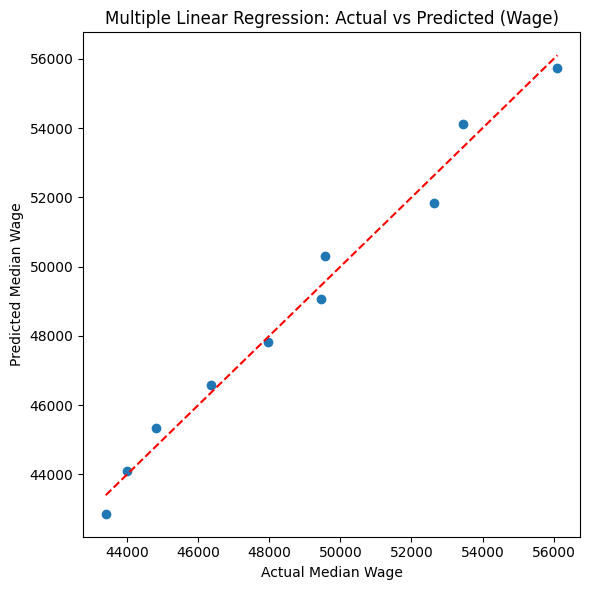

In [94]:
# Actual vs Predicted — Multiple Linear Regression (Wage)
plt.figure(figsize=(6,6))
plt.scatter(y_wage, wage_pred_multi)
plt.plot([y_wage.min(), y_wage.max()],
         [y_wage.min(), y_wage.max()],
         'r--')
plt.xlabel("Actual Median Wage")
plt.ylabel("Predicted Median Wage")
plt.title("Multiple Linear Regression: Actual vs Predicted (Wage)")
plt.tight_layout()
plt.savefig("Actual_vs_Predicted_wage_multreg.png")
plt.show()


In [95]:
#imports for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [96]:
#selecting the features
pca_features = df[["Employment", "Median_Wage", "AI_Popularity"]]

#standartizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_features)




In [97]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=["Employment", "Median_Wage", "AI_Popularity"]
)
loadings


Explained variance ratio: [0.65290663 0.28855645]
Total variance explained: 0.9414630799948284


,PC1,PC2
Employment,0.365657,0.921505
Median_Wage,0.643739,-0.351932
AI_Popularity,0.672231,-0.164233


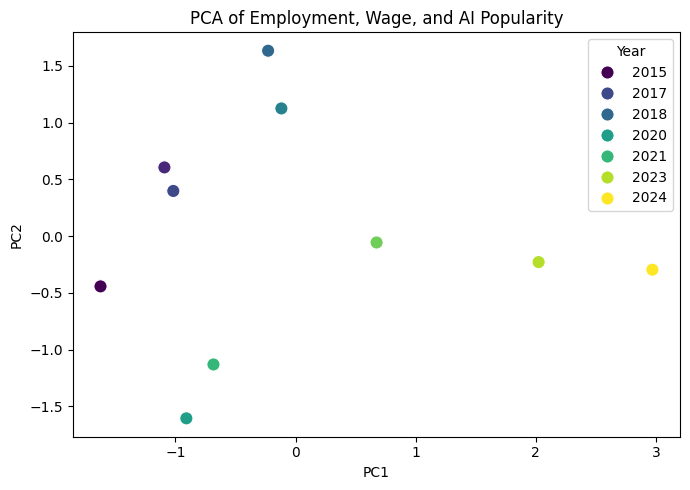

In [98]:
#plot
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Year"] = df["Year"]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Year",
    palette="viridis",
    s=90
)
plt.title("PCA of Employment, Wage, and AI Popularity")
plt.tight_layout()
plt.savefig("Emp_wage_ai_PCA.png")
plt.show()
